In [1]:
import numpy as np
import pandas as pd
import geopandas 
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib import cm
from matplotlib.animation import FuncAnimation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as mtick

In [2]:
plt.rcParams['axes.ymargin'] = 0
plt.rcParams['axes.xmargin'] = 0
plt.rcParams.update({'font.size': 32})

In [3]:
def import_geo_data(filename, index_col = "Date", FIPS_name = "FIPS"):
    map_data = geopandas.read_file(filename = filename,
                                   index_col = index_col)
    map_data.rename(columns = {"State":"state"},
                    inplace = True
                   )
    map_data[FIPS_name] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
    map_data[FIPS_name] = map_data[FIPS_name].astype(np.int64)
    map_data.set_index(FIPS_name, inplace = True)

    return map_data

    

In [4]:
fips_name = "fips_code"
map_data = import_geo_data(
    filename = "countiesWithStatesAndPopulation.shp",
    index_col = "Date",
    FIPS_name = fips_name)
map_data

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
21007,21,007,00516850,0500000US21007,Ballard,06,639387454,69473325,7888.0,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,21,017,00516855,0500000US21017,Bourbon,06,750439351,4829777,19788.0,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,21,031,00516862,0500000US21031,Butler,06,1103571974,13943044,12879.0,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,21,065,00516879,0500000US21065,Estill,06,655509930,6516335,14106.0,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,21,069,00516881,0500000US21069,Fleming,06,902727151,7182793,14581.0,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...,...,...,...,...,...,...,...,...
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [5]:
map_data["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3142, dtype: geometry

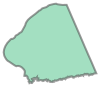

In [6]:
map_data["geometry"].loc[21007]

In [7]:
map_data[map_data["NAME"] == "Cass"]

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,geometry
fips_code,,,,,,,,,,,
38017,38,017,01034226,0500000US38017,Cass,06,4571248512,7579105,181923.0,North Dakota,"POLYGON ((-97.70618 46.99106, -97.70601 46.992..."
48067,48,067,01383819,0500000US48067,Cass,06,2426706492,60517775,30026.0,Texas,"POLYGON ((-94.65384 32.91704, -94.65367 32.954..."
17017,17,017,00424210,0500000US17017,Cass,06,973191108,20570537,12147.0,Illinois,"POLYGON ((-90.58176 39.87916, -90.57723 39.889..."
27021,27,021,00659456,0500000US27021,Cass,06,5235592037,1016632998,29779.0,Minnesota,"POLYGON ((-94.78713 46.80394, -94.72310 46.804..."
18017,18,017,00450339,0500000US18017,Cass,06,1067476806,6973611,37689.0,Indiana,"POLYGON ((-86.58162 40.75039, -86.58157 40.754..."
26027,26,027,01622956,0500000US26027,Cass,06,1269367168,47147839,51787.0,Michigan,"POLYGON ((-86.22610 41.76002, -86.22581 41.774..."
19029,19,029,00465204,0500000US19029,Cass,06,1461422455,1787165,12836.0,Iowa,"POLYGON ((-95.15557 41.21274, -95.15532 41.217..."
29037,29,037,00758473,0500000US29037,Cass,06,1804223330,14963262,105780.0,Missouri,"POLYGON ((-94.61270 38.48315, -94.61273 38.484..."
31025,31,025,00835834,0500000US31025,Cass,06,1443537069,22114716,26248.0,Nebraska,"POLYGON ((-96.46386 41.01607, -96.44914 41.015..."


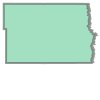

In [8]:
map_data["geometry"].loc[38017]

In [9]:
u_data = pd.read_csv("countyUnemploymentData.csv",
                     encoding = "latin1",
                     parse_dates = True,
                     index_col = "date")
u_data

C:\Users\JLCat\AppData\Local\Temp\ipykernel_24452\2252020281.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  u_data = pd.read_csv("countyUnemploymentData.csv",


,state_fips,county_fips,Location,Labor Force,Employed,Unemployed,Unemployment Rate,fips_code
date,,,,,,,,
2019-08-01,1,1,Autauga County AL,"26,079","25,368",711,2.7,1001
2019-08-01,1,3,Baldwin County AL,"97,939","95,367","2,572",2.6,1003
2019-08-01,1,5,Barbour County AL,"8,652","8,322",330,3.8,1005
2019-08-01,1,7,Bibb County AL,"8,670","8,403",267,3.1,1007
2019-08-01,1,9,Blount County AL,"25,309","24,641",668,2.6,1009
...,...,...,...,...,...,...,...,...
2021-08-01,72,145,"Vega Baja Municipio, PR","13,228","11,669","1,559",11.8,72145
2021-08-01,72,147,"Vieques Municipio, PR","2,550","2,168",382,15.0,72147
2021-08-01,72,149,"Villalba Municipio, PR","7,053","6,147",906,12.8,72149


In [10]:
u_data.dtypes

state_fips            int64
county_fips           int64
Location             object
Labor Force          object
Employed             object
Unemployed           object
Unemployment Rate    object
fips_code             int64
dtype: object

In [11]:
u_data.reset_index(inplace = True)
index = u_data.dropna(subset = "fips_code", axis = 0).index
# index = u_data["fips_code"]/.dropna(axis = 0).index
u_data = u_data.loc[index]
u_data

,date,state_fips,county_fips,Location,Labor Force,Employed,Unemployed,Unemployment Rate,fips_code
0,2019-08-01,1,1,Autauga County AL,"26,079","25,368",711,2.7,1001
1,2019-08-01,1,3,Baldwin County AL,"97,939","95,367","2,572",2.6,1003
2,2019-08-01,1,5,Barbour County AL,"8,652","8,322",330,3.8,1005
3,2019-08-01,1,7,Bibb County AL,"8,670","8,403",267,3.1,1007
4,2019-08-01,1,9,Blount County AL,"25,309","24,641",668,2.6,1009
...,...,...,...,...,...,...,...,...,...
80470,2021-08-01,72,145,"Vega Baja Municipio, PR","13,228","11,669","1,559",11.8,72145
80471,2021-08-01,72,147,"Vieques Municipio, PR","2,550","2,168",382,15.0,72147
80472,2021-08-01,72,149,"Villalba Municipio, PR","7,053","6,147",906,12.8,72149
80473,2021-08-01,72,151,"Yabucoa Municipio, PR","8,478","7,521",957,11.3,72151


In [12]:
u_data["fips_code"] = u_data["fips_code"].astype(int)
u_data.set_index(["fips_code", "date"], inplace = True)
u_data = u_data[list(u_data.keys())[-4:]]
u_data

,,Labor Force,Employed,Unemployed,Unemployment Rate
fips_code,date,,,,
1001,2019-08-01,"26,079","25,368",711,2.7
1003,2019-08-01,"97,939","95,367","2,572",2.6
1005,2019-08-01,"8,652","8,322",330,3.8
1007,2019-08-01,"8,670","8,403",267,3.1
1009,2019-08-01,"25,309","24,641",668,2.6
...,...,...,...,...,...
72145,2021-08-01,"13,228","11,669","1,559",11.8
72147,2021-08-01,"2,550","2,168",382,15.0
72149,2021-08-01,"7,053","6,147",906,12.8


## Combine u_data and map_data

In [13]:
import copy as copy

def create_merged_geo_dataframe(data, map_data, dates):
    matching_gpd = {}
    # gathered fips_code from index, remove duplicates because of panel df
    counties = data.index.get_level_values("fips_code").unique()
    # go through each column in the panda dataframe
    for key, val in data.items():
        # save a copy of the map_data (df) for each key
        ## keys will be Labor Force, Unemployment Rate, etc...
        matching_gpd[key] = copy.copy(map_data[map_data.index.isin(counties)])
        # add each date for the key from the panel with the date as
        #  the column name
        for date in dates:
            val_slice = val[val.index.get_level_values("date") == date]
            val_slice = val_slice.reset_index(drop = False).set_index("fips_code")
            matching_gpd[key][date] = val_slice[key]
    return matching_gpd
dates = u_data.index.get_level_values("date").unique()
u = create_merged_geo_dataframe(u_data, map_data, dates)
u

{'Labor Force':            STATEFP COUNTYFP  COUNTYNS        AFFGEOID       NAME LSAD  \
 fips_code                                                               
 21007           21      007  00516850  0500000US21007    Ballard   06   
 21017           21      017  00516855  0500000US21017    Bourbon   06   
 21031           21      031  00516862  0500000US21031     Butler   06   
 21065           21      065  00516879  0500000US21065     Estill   06   
 21069           21      069  00516881  0500000US21069    Fleming   06   
 ...            ...      ...       ...             ...        ...  ...   
 31073           31      073  00835858  0500000US31073     Gosper   06   
 39075           39      075  01074050  0500000US39075     Holmes   06   
 48171           48      171  01383871  0500000US48171  Gillespie   06   
 55079           55      079  01581100  0500000US55079  Milwaukee   06   
 26139           26      139  01623012  0500000US26139     Ottawa   06   
 
                 ALAN

In [14]:
u_data = u
# change values to numeric values
for key in u_data.keys():
    if u_data[key][dates[0]].dtypes == object:
        for date in dates:
            u_data[key][date] = pd.to_numeric(u_data[key][date], errors = "coerce")

In [15]:
def select_data_within_bounds(data, minx, miny, maxx, maxy):
    data = data[data.bounds["maxx"] <= maxx]
    data = data[data.bounds["maxy"] <= maxy]
    data = data[data.bounds["minx"] >= minx]
    data = data[data.bounds["miny"] >= miny]

    return data
    

In [16]:
for key, val in u_data.items():
    df = val
    minx = df.bounds["minx"].min()
    miny = df.bounds["miny"].min()
    maxy = df.bounds["maxy"].max()
    maxx = -58

    bounded_data = select_data_within_bounds(df, minx, miny, maxx, maxy)
    u_data[key] = bounded_data   


In [17]:
key = "Unemployment Rate"
udf = u_data[key]

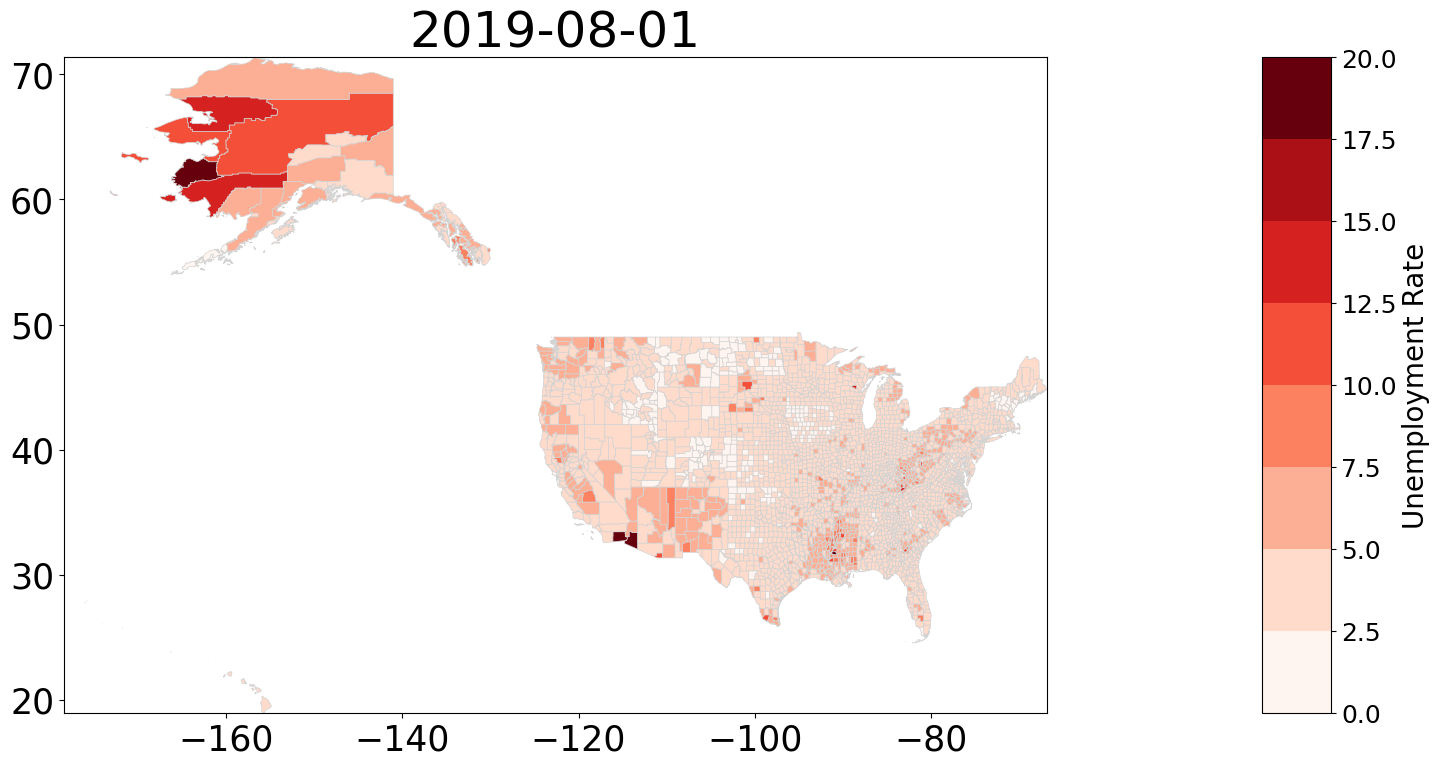

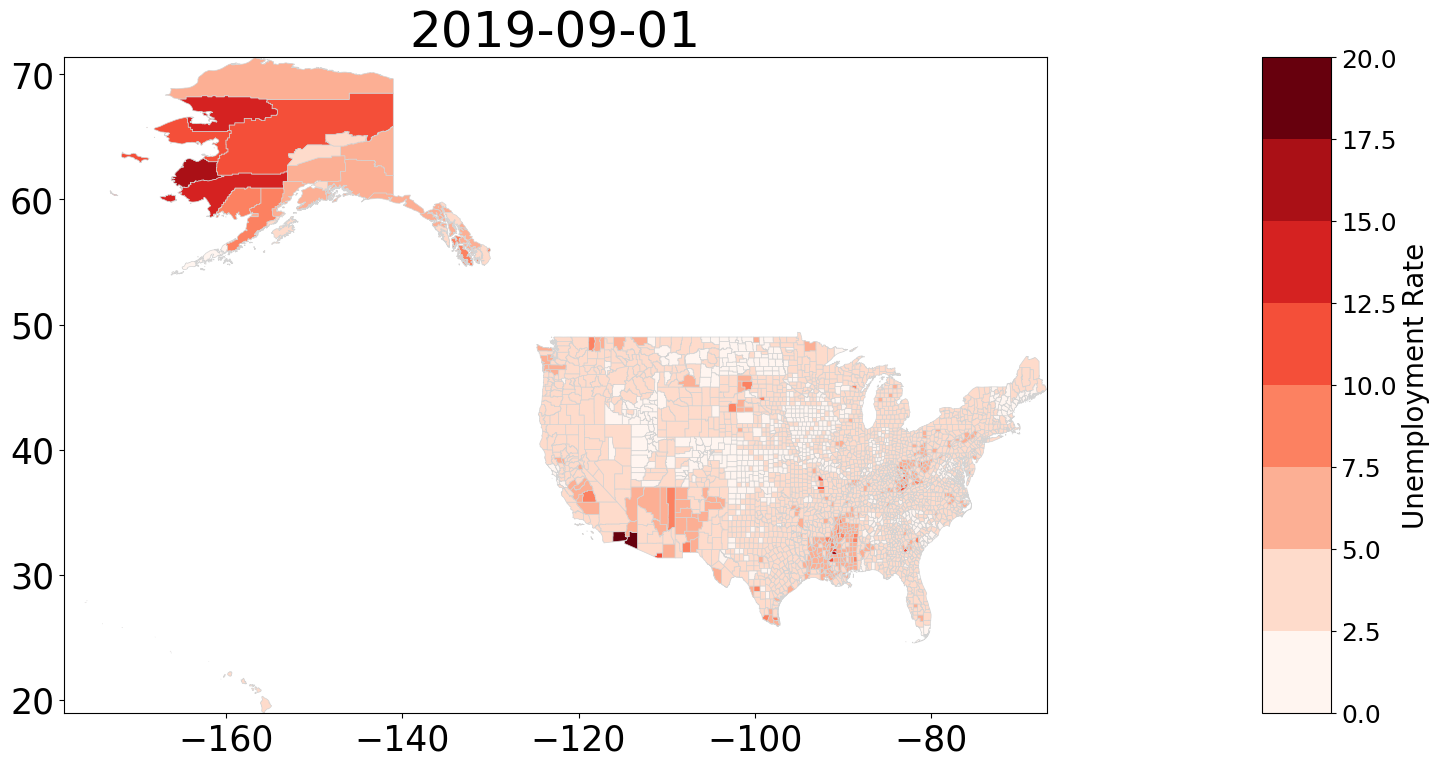

In [18]:
import warnings 
warnings.filterwarnings("ignore")
pp = PdfPages("County Unemployment Rate.pdf")
for date in dates[:2]:
    fig, ax = plt.subplots(figsize = (19,9),
                           subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size":30})
    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)

    vmin = 0
    vmax = 20
    cmap = cm.get_cmap("Reds", 8)
    norm = cm.colors.Normalize(vmin = vmin, vmax = vmax)
    sm = cm.ScalarMappable(cmap=cmap, norm = norm)
    divider = make_axes_locatable(ax)
    size ="5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    cbar = fig.colorbar(sm, cax = cax, cmap = cmap)
    cbar.ax.tick_params(labelsize = 18)
    vals = list(cbar.ax.get_yticks())
    # vals.append(vmax)
    # cbar.ax.set_yticklabels(vals)
    cbar.ax.set_ylabel(key, fontsize = 20)
    udf.plot(column = date, 
            norm = norm,
            cmap = cmap,
            edgecolor="lightgrey",
            linewidth = .5,
            ax = ax, 
            cax =ax)
    ax.set_title(str(date)[:10])
    pp.savefig(fig, bbox_inches = "tight")
pp.close()


In [19]:
# Normalize Unemployment to February 2020
key = "Unemployment Rate"
new_key = "Normalized " + key + " (Feb 2020)"
feb2020 =dates[6]
u_data[new_key] = u_data[key].copy()
for date in dates:
    u_data[new_key][date] = u_data[key][date].sub(
        u_data[key][feb2020])
u_data[new_key].tail()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,NAME,LSAD,ALAND,AWATER,Population,state,...,2020-11-01 00:00:00,2020-12-01 00:00:00,2021-01-01 00:00:00,2021-02-01 00:00:00,2021-03-01 00:00:00,2021-04-01 00:00:00,2021-05-01 00:00:00,2021-06-01 00:00:00,2021-07-01 00:00:00,2021-08-01 00:00:00
fips_code,,,,,,,,,,,,,,,,,,,,,
31073,31,073,00835858,0500000US31073,Gosper,06,1186616237,11831826,1990.0,Nebraska,...,-0.3,-0.6,-0.4,-0.1,-0.3,-0.4,-0.3,-0.3,-0.8,-0.7
39075,39,075,01074050,0500000US39075,Holmes,06,1094405866,3695230,43960.0,Ohio,...,-1.2,-0.7,-0.2,-0.2,-0.9,-1.2,-0.7,0.5,0.4,-0.1
48171,48,171,01383871,0500000US48171,Gillespie,06,2740719114,9012764,26988.0,Texas,...,1.3,1.2,1.8,1.8,1.7,1.1,1.1,1.5,1.0,0.7
55079,55,079,01581100,0500000US55079,Milwaukee,06,625440563,2455383635,945726.0,Wisconsin,...,1.8,1.3,1.6,1.9,2.0,2.1,1.6,2.4,1.9,1.8
26139,26,139,01623012,0500000US26139,Ottawa,06,1459502408,2765830983,291830.0,Michigan,...,2.1,2.8,2.5,1.9,2.0,1.4,2.0,2.0,1.8,1.1


2020-01-01 00:00:00


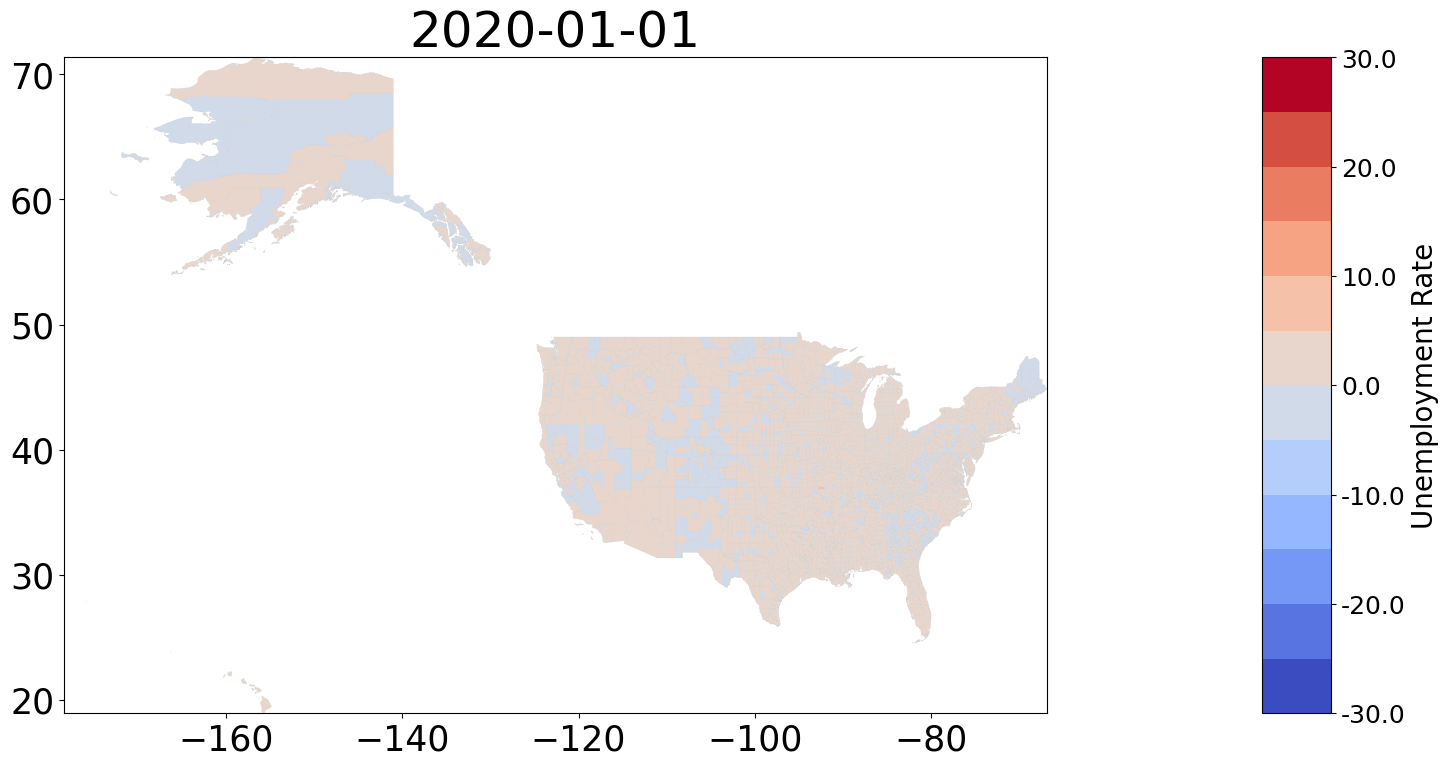

2020-02-01 00:00:00


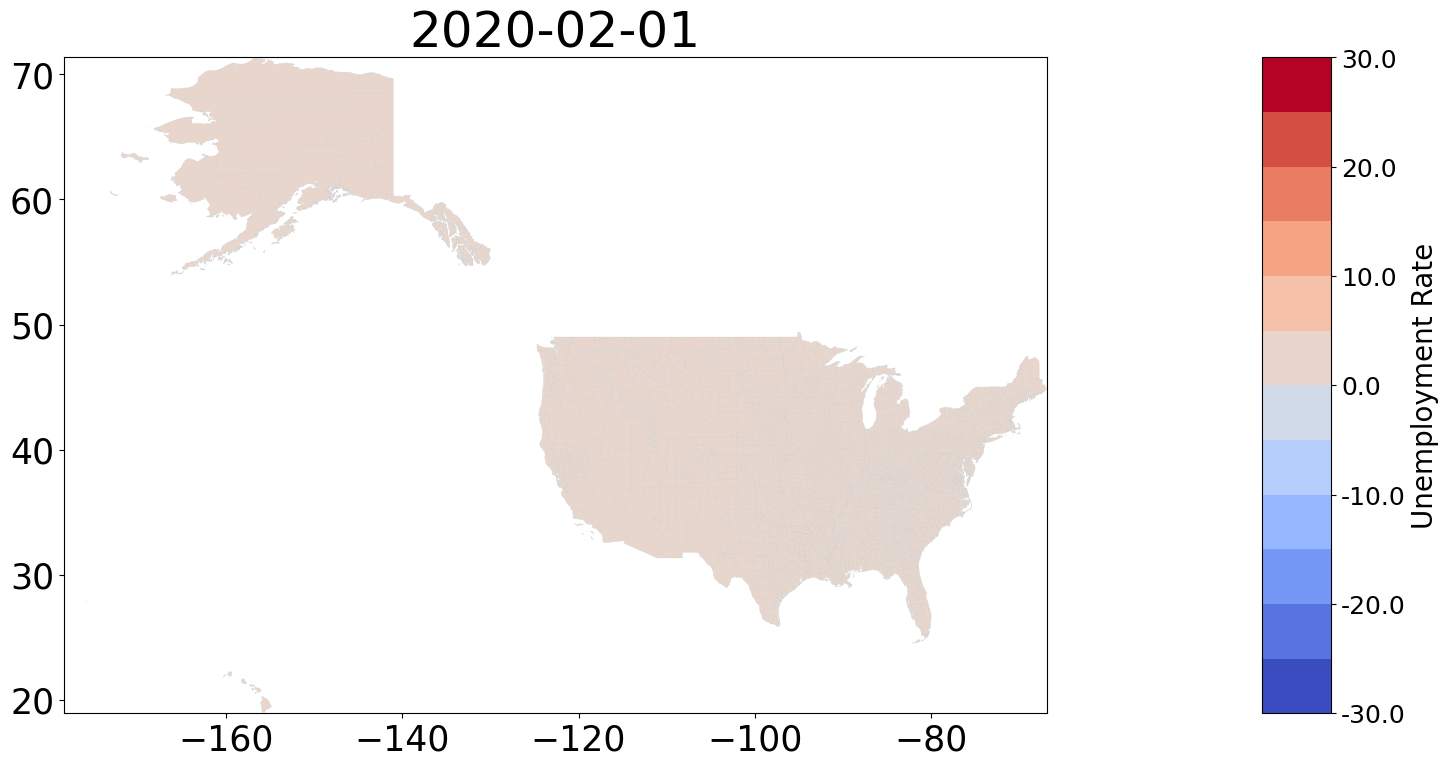

2020-03-01 00:00:00


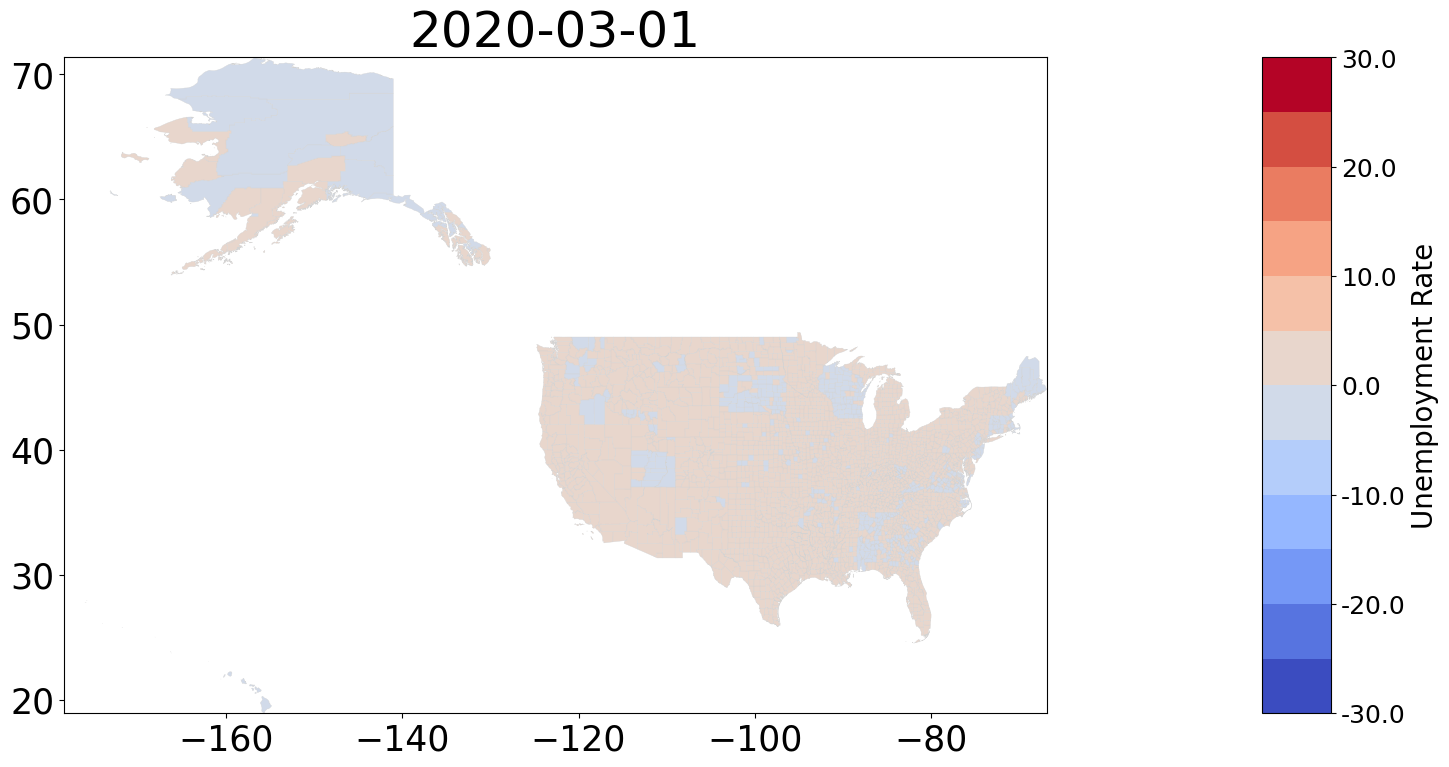

2020-04-01 00:00:00


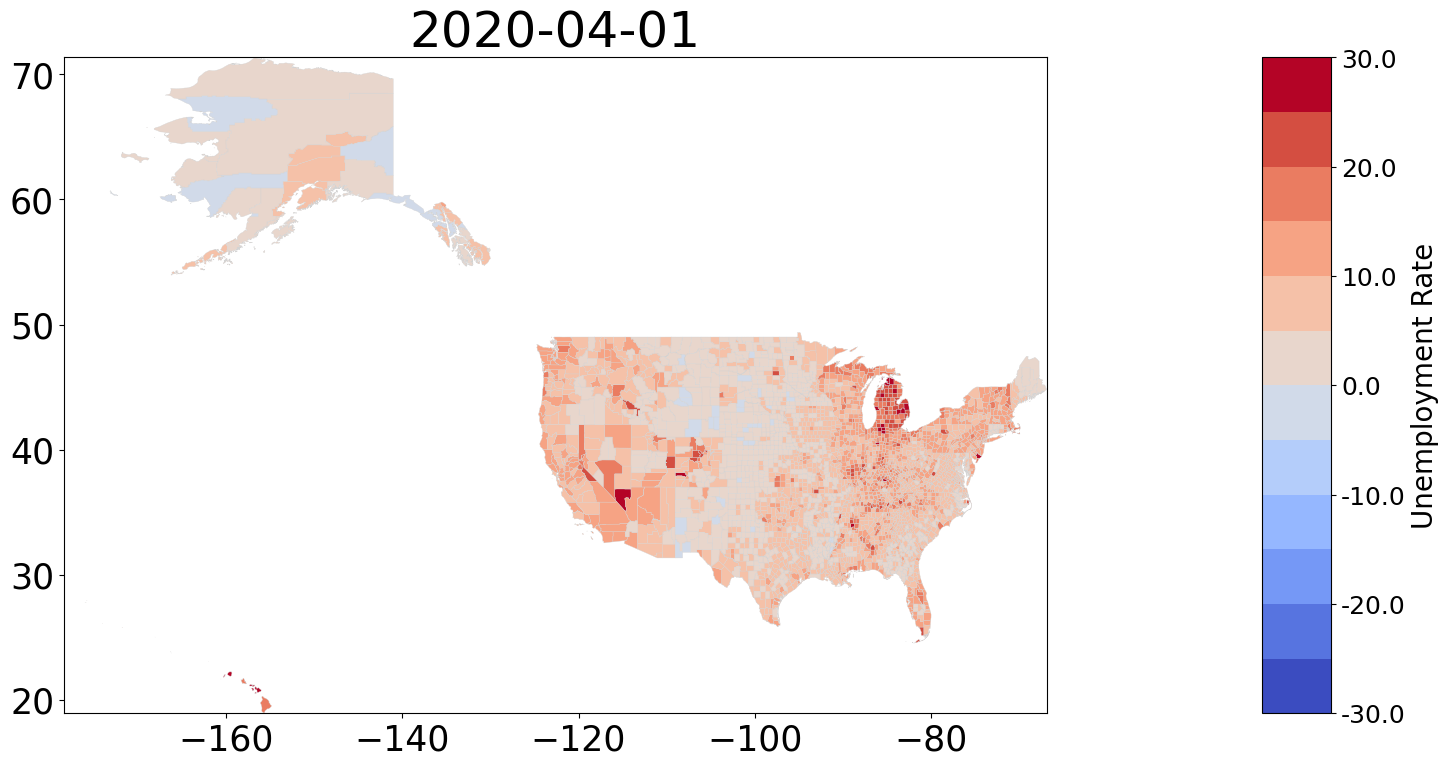

In [20]:
def plot_date_data(df, date, cmap = "Reds", ndiv = 8, vmin = 0, vmax = 20,
                   pp = None, show_fig = True):
    print(date)
    fig, ax = plt.subplots(figsize=(19,9),
                          subplot_kw = {"aspect":"equal"})
    plt.rcParams.update({"font.size": 30})

    plt.xticks(fontsize = 25)
    plt.yticks(fontsize = 25)
    cmap = cm.get_cmap(cmap, ndiv)
    norm = cm.colors.Normalize(vmin=vmin, vmax=vmax)
    ### add colorbar
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    # prepare space for colorbar
    divider = make_axes_locatable(ax)
    size = "5%"
    cax = divider.append_axes("right", size = size, pad = .1)
    # add colorbar to figure
    cbar = fig.colorbar(sm, cax=cax, cmap= cmap)
    cbar.ax.tick_params(labelsize=18)
    vals = list(cbar.ax.get_yticks())
    vals.append(vmax)
    cbar.ax.set_yticklabels(vals)#[int(x) for x in vals])
    cbar.ax.set_ylabel(key, fontsize=20)

    df.plot(ax=ax, cax=ax, column = date,
            vmin=vmin, vmax=vmax,
            cmap=cmap, legend=False, 
            linewidth = .25, edgecolor="lightgrey",norm=norm)
    ax.set_title(str(date)[:10])
    
    if show_fig:
        plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches = "tight")
    plt.close()

pp = PdfPages("County Unemployment Normalized.pdf")
for date in dates[5:9]:
    plot_date_data(u_data[new_key], date = date, cmap = "coolwarm", ndiv = 12,
                   vmin = -30, vmax = 30, pp = pp,
                   show_fig = True)
pp.close()

In [21]:
u_data[new_key][dates[0:7]]

,2019-08-01 00:00:00,2019-09-01 00:00:00,2019-10-01 00:00:00,2019-11-01 00:00:00,2019-12-01 00:00:00,2020-01-01 00:00:00,2020-02-01 00:00:00
fips_code,,,,,,,
21007,-0.5,-1.2,-1.3,-1.2,-0.3,0.6,0.0
21017,-0.5,-0.5,-0.6,-0.6,-0.5,0.4,0.0
21031,-0.7,-1.4,-1.1,-1.1,-1.0,0.5,0.0
21065,-1.2,-1.4,-1.1,-1.1,-0.8,0.4,0.0
21069,-1.2,-1.8,-1.7,-1.8,-1.3,-0.1,0.0
...,...,...,...,...,...,...,...
31073,0.3,0.7,0.5,0.2,0.1,0.0,0.0
39075,-0.2,-0.3,-0.4,-0.6,-0.5,0.6,0.0
48171,-0.1,-0.2,-0.4,-0.3,-0.5,0.0,0.0


In [29]:
import plotly.express as px
plot_df = u_data[new_key].copy()
date_type = type(plot_df.keys()[-1])
# use if statement to only change datetime to string
plot_df.rename(columns = {name:str(name)[:7] for name in plot_df.keys() if type(name) == date_type}, inplace = True)

plot_df["geometry"]

fips_code
21007    POLYGON ((-89.18137 37.04630, -89.17938 37.053...
21017    POLYGON ((-84.44266 38.28324, -84.44114 38.283...
21031    POLYGON ((-86.94486 37.07341, -86.94346 37.074...
21065    POLYGON ((-84.12662 37.64540, -84.12483 37.646...
21069    POLYGON ((-83.98428 38.44549, -83.98246 38.450...
                               ...                        
31073    POLYGON ((-100.09510 40.43866, -100.08937 40.4...
39075    POLYGON ((-82.22066 40.66758, -82.19327 40.667...
48171    POLYGON ((-99.30400 30.49983, -99.28234 30.499...
55079    POLYGON ((-88.06959 42.86726, -88.06959 42.872...
26139    POLYGON ((-86.26432 43.11830, -86.25103 43.118...
Name: geometry, Length: 3140, dtype: geometry

In [ ]:
cname = str(list(plot_df.keys())[-1])            
plot_df[cname] = plot_df[cname].round(2)
hover_name = "NAME"
title = new_key[:-1] + " = 0)"
fig = px.choropleth_mapbox(plot_df.reset_index(),
                           geojson = plot_df,
#                            featureidkey = "fips_code",
                           locations = 'fips_code',
                           hover_name=hover_name,
                           hover_data = [cname],
                           color=cname, 
#                            animation_frame="Variable Name",
                           color_continuous_scale="ylgnbu",
                           center={'lat':df["geometry"].centroid.y.mean(), 
                                   'lon':df["geometry"].centroid.x.mean()},
                            zoom = 5,
                            opacity=.6,
#                            range_color=(plot_df[cname].min(), plot_df[cname].max()),
                           title= title,
                           mapbox_style="carto-positron",
                           height=900,
#                            labels={cname:'U Change:' + cname  }
)
# fig.show()
fig.write_html(new_key+".html")

In [ ]:
# u_data[new_key]["geometry"]